 ## Example for Data Processing (Part 2)

#### **TO DO**:
- Data visualization (3 levels)

[Interactive Widgets](https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/): [Widget List](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) ; [Using Interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

Filename:  C:/Users/JTavares/Documents/GitHub/Tese/2/data1-processed.csv


### Import CSV


In [2]:
import pandas as pd
import file
import os
import matplotlib.pyplot as plt

path = file.gui_fname()
path = path.decode('latin-1')
print("Filename: ", path)

df = pd.read_csv(path)

display(df.head())

Filename:  C:/Users/JTavares/OneDrive - Universidade de Lisboa/IST/data/2. processed/test - processed 1.csv


,index,Ordem,n_operations,Tipo de operação,Tipo de operação n2,Qtd.ordem,out_Qtd.ordem,dif,out_defects,CT,...,car1,car2,esm,dim1_1,dim1_2,car1_1,f_prep,li_bd,var,outliers
0,6,1000234824,1,APLICAÇÃO DE VERNIZ,1ª APLICAÇÃO DE VERNIZ OURO INTERIOR,5305,5305,63,63,LE04,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,1.187559,False
1,7,1000234824,2,APLICAÇÃO DE VERNIZ,2ª APLICAÇÃO DE VERNIZ OURO INTERIOR,5242,5242,11,11,LE04,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,0.209844,False
2,8,1000234824,3,APLICAÇÃO DE ESMALTE BRANCO,APLICAÇÃO DE ESMALTE BRANCO,5231,5231,71,71,LE06,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,1.357293,False
3,9,1000234824,4,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ DE ACABAMENTO,5160,5160,181,181,LI05,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,3.507752,False
4,10,1000234824,5,CORTE DE FOLHA,CORTE DE FOLHA,4979,4979,22,22,CS11,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,0.441856,False


---

### Select data to be observed
- Select features to be evaluated
- Select level of visualisation

In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown


data = df.keys()
dtypes = df.dtypes
features = [out for out in data if "out_" not in out]
output = [out for out in data if "out_" in out]
checkboxes = [widgets.Checkbox(value=False, description=label) for label in features]
out_checkboxes = [widgets.Checkbox(value=False, description=label) for label in output]
out_options = [widgets.Dropdown(options=['sum', 'mean', 'max', 'min'], description='Aggregate options:') for x in output]
out_qt = widgets.ToggleButtons(options=output, description='Detected defects:', style = {'description_width': 'initial'})
butt = widgets.Button(description="OK", icon="check")


lst = [[], [], []] ; out_lst = [[], []]
for i in range(len(checkboxes)):
    lst[i%3].append(checkboxes[i])


tab1 = widgets.HBox([widgets.VBox(lst[0]), widgets.VBox(lst[1]), widgets.VBox(lst[2])])
tab2 = widgets.HBox([out_qt]) # widgets.VBox(out_lst[0]), widgets.VBox(out_lst[1]), out_qt])

outt = widgets.Output()
selected_features = []
selected_output = []

def on_check_clicked(b):
    with outt:
        clear_output()
        global selected_data
        global selected_output
        selected_data = []
        selected_output = []
        for i in range(0, len(checkboxes)):
            if checkboxes[i].value == True:
                selected_data = selected_data + [checkboxes[i].description]
#         for i in range(0, len(out_checkboxes)):
#             if out_checkboxes[i].value == True:
#                 selected_output[out_checkboxes[i].description] = out_options[i].value
        if output[0] != out_qt.value:
            selected_output = [out_qt.value, output[0]]
        else: 
            selected_output = output
            
        print("Selected data: ", selected_data)
        print("\nSelected output: ", selected_output)
        
        


tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Features')
tab.set_title(1, 'Output')
widgets.VBox(children=[tab])
        
butt.on_click(on_check_clicked)
display(tab, butt, outt)

Button(description='OK', icon='check', style=ButtonStyle())

Output()

In [6]:
selected_data = ['Tipo de operação', 'Tipo de operação n2', 'CT', 'Qtd.ordem', 'n_operations', 'Mês', 'week_day','Difference',
                 'dim1', 'dim2', 'dim3', 'car1', 'car2', 'car1_1']
selected_output = ['out_defects', 'out_Qtd.ordem']

df = df.astype({'Mês': 'int32', 'n_operations': 'int32'})

# df.dtypes

In [16]:
b = Bttns()

b.output_1D()

### Selection of 2 variables
- [seaborn.scatterplot](seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [18]:
b = Bttns()

b.output_2D()

### Other analysis
Tipo de operação

df shape: (27032, 43)
df shape (defects): (12218, 43)
percentage: 45.19828351583309




,Tipo de operação,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,APLICAÇÃO DE ESMALTE BRANCO,2003,1613,395,80.53,7.41,13.20
1,APLICAÇÃO DE TINTA DE IMPRESSÃO,7361,3604,632,48.96,27.23,29.50
2,APLICAÇÃO DE VERNIZ,10610,5916,930,55.76,39.25,48.42
3,CORTE DE FOLHA,5383,1069,98,19.86,19.91,8.75
4,EMBALAMENTO,1675,16,4,0.96,6.20,0.13


---

sel ['# prod. operations (total)', '# prod. operations with defect']
object
[]
sel ['# prod. operations (total)', '# prod. operations with defect']


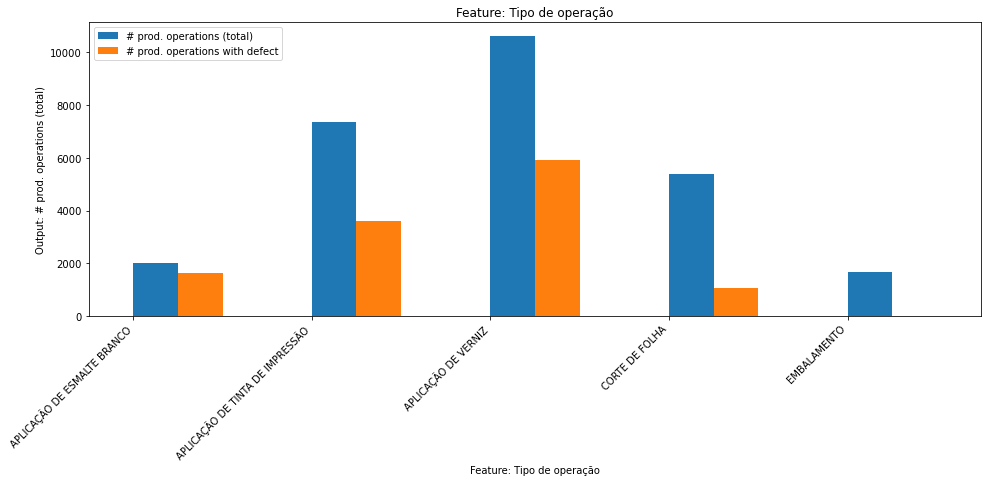

<AxesSubplot:ylabel='% of total prod. operations'>

<AxesSubplot:ylabel='% of total defective operations'>

,# de lotes com defeito
out_defects,
"(-2000, -1000]",0
"(-1000, -100]",0
"(-100, -30]",0
"(-30, -10]",0
"(-10, -1]",0
"(-1, 0]",14814
"(0, 3]",0
"(3, 5]",0
"(5, 10]",1958




Quantidade inicialmente prevista: 80761518
Quantidade c/ defeito: 968259
Percentagem de defeito 1.1989113428997211


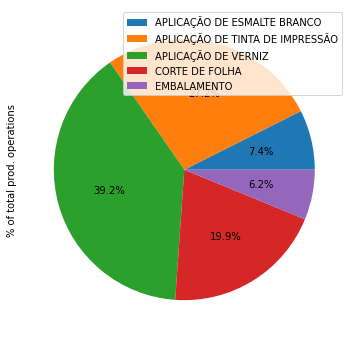

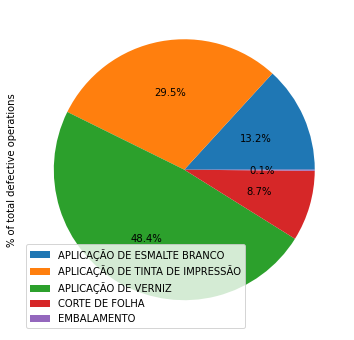

In [17]:
print("df shape:", df.shape)
print("df shape (defects):", df[df["out_defects"] > 0].shape)
print("percentage:", df[df["out_defects"] > 0].shape[0]/df.shape[0]*100)
print("\n")

# production orders (total)
s1 = df.groupby("Tipo de operação")["Tipo de operação"].count()

# production orders with defect
s2 = df[df["out_defects"] > 0].groupby("Tipo de operação")["Tipo de operação"].count()

# production orders with > 100 defects
s3 = df[df["out_defects"] > 100].groupby("Tipo de operação")["Tipo de operação"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()
df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
display(df2)

show_graphic1D(df2,"Tipo de operação", sel_output=["# prod. operations (total)","# prod. operations with defect"])

df2.set_index("Tipo de operação", inplace=True)

plt1 = df2.plot(kind="pie",y="% of total prod. operations",labels=None,autopct='%1.1f%%')
plt2 = df2.plot(kind="pie",y="% of total defective operations",labels=None,autopct='%1.1f%%')

display(plt1,plt2)
# y="# prod. operations (total)"
# subplots=True

print("\n")
ranges = [-2000, -1000, -100, -30, -10, -1, 0, 3, 5,10,20,30,50,100,1000,10000]
df2 = df['out_defects'].groupby(pd.cut(df['out_defects'], ranges)).count().to_frame()
df2.rename(columns={"out_defects": "# de lotes com defeito"}, inplace=True)

display(df2)

print("\n")
print("Quantidade inicialmente prevista:", df["out_Qtd.ordem"].sum())
print("Quantidade c/ defeito:", df["out_defects"].sum())
print("Percentagem de defeito",df["out_defects"].sum()/df["out_Qtd.ordem"].sum()*100)

#### Tipo de operação n2

,Tipo de operação n2,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,1ª APLICAÇÃO DE VERNIZ OURO INTERIOR,136,72,13,52.94,0.50,0.59
1,2ª APLICAÇÃO DE VERNIZ OURO INTERIOR,177,105,10,59.32,0.65,0.86
2,APLICAÇÃO DE ESMALTE BRANCO,2003,1613,395,80.53,7.41,13.20
3,APLICAÇÃO DE TINTA DE IMPRESSÃO,6932,3287,613,47.42,25.64,26.90
4,APLICAÇÃO DE TINTA DE IMPRESSÃO MATE,429,317,19,73.89,1.59,2.59
5,APLICAÇÃO DE VERNIZ DE ACABAMENTO,6159,3067,319,49.80,22.78,25.10
6,APLICAÇÃO DE VERNIZ INCOLOR,748,469,119,62.70,2.77,3.84
7,APLICAÇÃO DE VERNIZ ORGANOSOL,455,260,19,57.14,1.68,2.13
8,APLICAÇÃO DE VERNIZ OURO,868,589,146,67.86,3.21,4.82
9,APLICAÇÃO DE VERNIZ OURO EXTERIOR,252,140,19,55.56,0.93,1.15


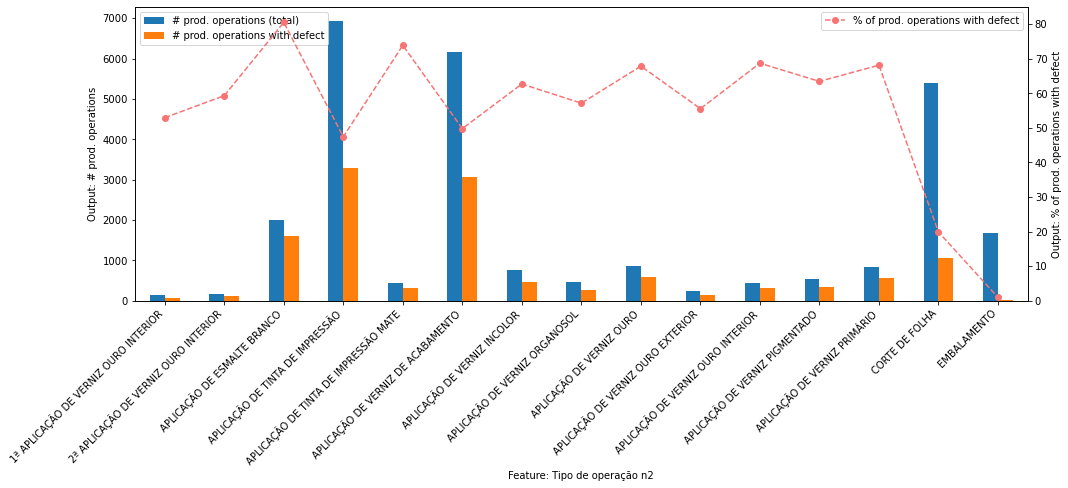

In [17]:
df4 = df.copy()

# production orders
s1 = df4.groupby("Tipo de operação n2")["Tipo de operação n2"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("Tipo de operação n2")["Tipo de operação n2"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("Tipo de operação n2")["Tipo de operação n2"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

# month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
#              8: "Aug", 9: "Sep", 10: "Out", 11: "Nov", 12: "Dec"}
# df2.replace({"Mês": month}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="Tipo de operação n2", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="Tipo de operação n2", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "Tipo de operação n2"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=85)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-Tipo de op n2.png'))

#### Centro de trabalho

,CT,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,CS05,796,177,18.00,22.24,2.94,1.45
1,CS06,866,207,11.00,23.90,3.20,1.69
2,CS07,586,187,7.00,31.91,2.17,1.53
3,CS08,240,20,7.00,8.33,0.89,0.16
4,CS09,273,27,12.00,9.89,1.01,0.22
5,CS11,150,10,3.00,6.67,0.55,0.08
6,CS13,156,13,5.00,8.33,0.58,0.11
7,CS15,615,102,12.00,16.59,2.28,0.83
8,CS16,601,90,7.00,14.98,2.22,0.74
9,CS17,798,140,13.00,17.54,2.95,1.15


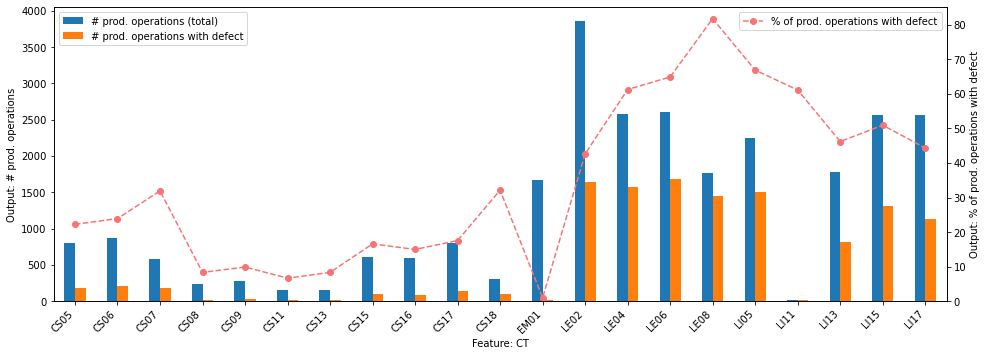

In [46]:
df4 = df.copy()

# production orders
s1 = df4.groupby("CT")["CT"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("CT")["CT"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("CT")["CT"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

# month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
#              8: "Aug", 9: "Sep", 10: "Out", 11: "Nov", 12: "Dec"}
# df2.replace({"Mês": month}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="CT", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="CT", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "CT"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=85)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-CT.png'))

#### Car1_1

,car1_1,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,BD-AE,13041,5893,1053.00,45.19,48.24,48.23
1,BD-CY,4062,1425,207.00,35.08,15.03,11.66
2,BD-RC,1113,570,73.00,51.21,4.12,4.67
3,BD-TC,1795,1043,154.00,58.11,6.64,8.54
4,BD-TL,994,295,35.00,29.68,3.68,2.41
5,LI-BT,1677,829,146.00,49.43,6.20,6.79
6,LI-BT/LD,122,66,21.00,54.10,0.45,0.54
7,LI-CI,4,2,NaN,50.00,0.01,0.02
8,LI-LD,2810,1409,249.00,50.14,10.40,11.53
9,LI-LD/BT,18,7,3.00,38.89,0.07,0.06


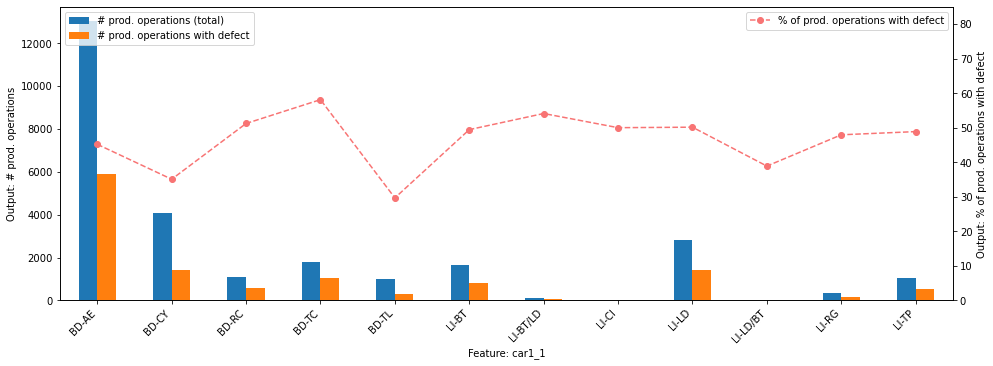

In [47]:
df4 = df.copy()

# production orders
s1 = df4.groupby("car1_1")["car1_1"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("car1_1")["car1_1"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("car1_1")["car1_1"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

# month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
#              8: "Aug", 9: "Sep", 10: "Out", 11: "Nov", 12: "Dec"}
# df2.replace({"Mês": month}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="car1_1", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="car1_1", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "car1_1"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=85)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-car1_1.png'))

#### Quantidade produzida

66625 5 (27032, 43) (25530, 43) 94.44362237348328


,Qtd.ordem,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,"(-4.995, 1004.5]",8744,2488,167,28.45,34.25,22.56
1,"(1004.5, 2004.0]",7101,2990,270,42.11,27.81,27.11
2,"(2004.0, 3003.5]",3485,1671,256,47.95,13.65,15.15
3,"(3003.5, 4003.0]",2122,1175,207,55.37,8.31,10.65
4,"(4003.0, 5002.5]",1220,723,147,59.26,4.78,6.55
5,"(5002.5, 6002.0]",1085,689,141,63.50,4.25,6.25
6,"(6002.0, 7001.5]",636,434,97,68.24,2.49,3.93
7,"(7001.5, 8001.0]",452,344,84,76.11,1.77,3.12
8,"(8001.0, 9000.5]",429,330,110,76.92,1.68,2.99
9,"(9000.5, 10000.0]",256,186,53,72.66,1.00,1.69


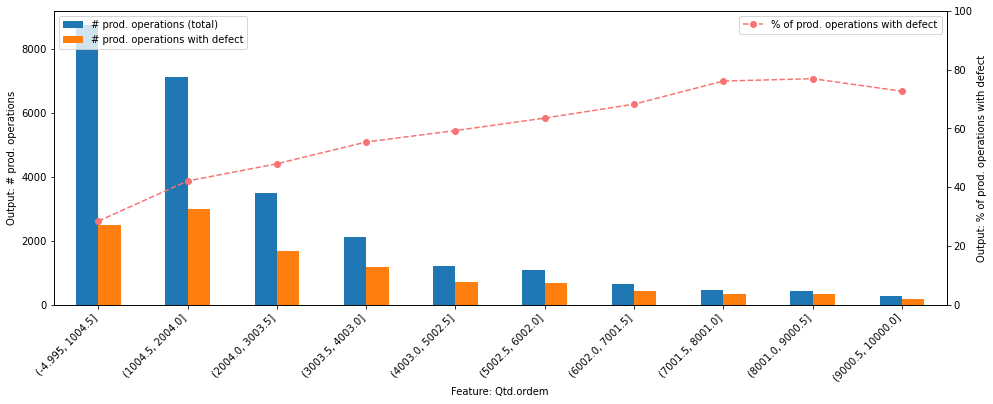

In [14]:
df3 = df.copy()
print(df3["Qtd.ordem"].max(),df3["Qtd.ordem"].min(),df3.shape,df3[df3["Qtd.ordem"] <= 10000].shape,
      df3[df3["Qtd.ordem"] <= 10000].shape[0]/df3.shape[0]*100)

df3 = df3[df3["Qtd.ordem"] <= 10000]
df3["bins"] = pd.cut(df3["Qtd.ordem"], bins=10)

# production orders
s1 = df3.groupby("bins")["bins"].count()

# production orders with defect
s2 = df3[df3["out_defects"] > 0].groupby("bins")["bins"].count()

# production orders with > 100 defects
s3 = df3[df3["out_defects"] > 100].groupby("bins")["bins"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"bins":"Qtd.ordem","s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
display(df2)

ax = df2.plot(x="Qtd.ordem", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="Qtd.ordem", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "Qtd.ordem"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=100)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-Qtd.ordem.png'))


df2.set_index("Qtd.ordem", inplace=True)

#### Difference


321.0 0.0 (27032, 43) (25108, 43) 92.88250961823024


,Difference,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,"(-0.018, 1.8]",21142027,262012,188225,1.24,28.05,29.77
1,"(1.8, 3.6]",16454771,183542,119079,1.12,21.83,20.85
2,"(3.6, 5.4]",12594971,148453,92507,1.18,16.71,16.87
3,"(5.4, 7.2]",10963047,116325,71038,1.06,14.55,13.22
4,"(7.2, 9.0]",5679574,59080,34643,1.04,7.54,6.71
5,"(9.0, 10.8]",1622576,22372,15073,1.38,2.15,2.54
6,"(10.8, 12.6]",2631868,36025,22495,1.37,3.49,4.09
7,"(12.6, 14.4]",2331187,23577,13846,1.01,3.09,2.68
8,"(14.4, 16.2]",1167779,17198,10237,1.47,1.55,1.95
9,"(16.2, 18.0]",778330,11555,7750,1.48,1.03,1.31


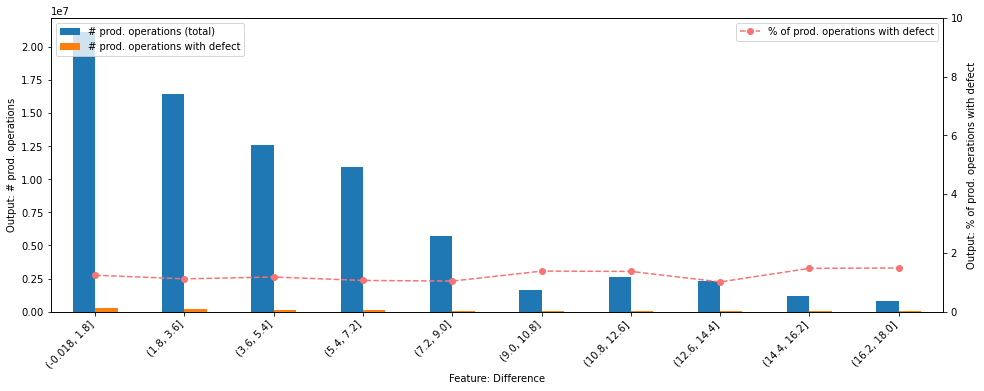

In [15]:
df3 = df.copy()
print(df3["Difference"].max(),df3["Difference"].min(),df3.shape,df3[df3["Difference"] <= 18].shape,
      df3[df3["Difference"] <= 18].shape[0]/df3.shape[0]*100)

df3 = df3[df3["Difference"] <= 18]
df3["bins"] = pd.cut(df3["Difference"], bins=10)

# production orders
s1 = df3.groupby("bins")["Qtd.ordem"].sum()

# production orders with defect
s2 = df3[df3["out_defects"] > 0].groupby("bins")["out_defects"].sum()

# production orders with > 100 defects
s3 = df3[df3["out_defects"] > 100].groupby("bins")["out_defects"].sum()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"bins":"Difference","s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
display(df2)

ax = df2.plot(x="Difference", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="Difference", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "Difference"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=10)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-Difference.png'))


df2.set_index("Difference", inplace=True)

#### Mês

,Mês,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,Jan,1910,919,155,48.12,7.07,7.52
1,Feb,1944,921,145,47.38,7.19,7.54
2,Mar,2531,1080,139,42.67,9.36,8.84
3,Apr,1993,903,124,45.31,7.37,7.39
4,May,2207,1005,186,45.54,8.16,8.23
5,Jun,2024,868,197,42.89,7.49,7.10
6,Jul,2558,1111,198,43.43,9.46,9.09
7,Aug,2174,1004,166,46.18,8.04,8.22
8,Sep,2372,1067,194,44.98,8.77,8.73
9,Out,2583,1184,203,45.84,9.56,9.69


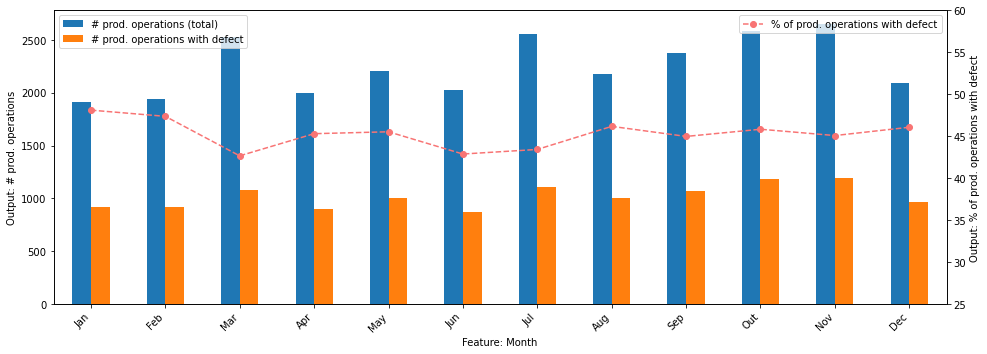

In [33]:
df4 = df.copy()

# production orders
s1 = df4.groupby("Mês")["Mês"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("Mês")["Mês"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("Mês")["Mês"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
             8: "Aug", 9: "Sep", 10: "Out", 11: "Nov", 12: "Dec"}
df2.replace({"Mês": month}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="Mês", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="Mês", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "Month"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=25, ymax=60)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-Mês.png'))

#### N operações

,n_operations,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,1,9622,5143,1294.00,53.45,36.64,42.97
1,2,8282,4037,464.00,48.74,31.54,33.73
2,3,6265,2230,234.00,35.59,23.86,18.63
3,4,2091,559,48.00,26.73,7.96,4.67


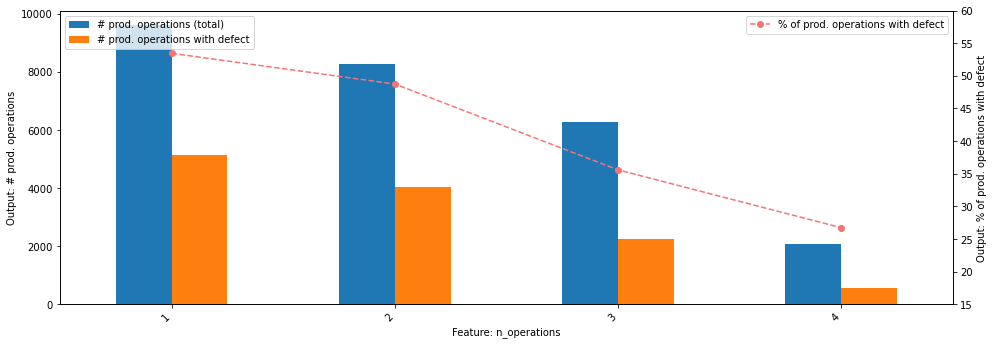

In [35]:
df4 = df.copy()

# production orders
s1 = df4.groupby("n_operations")["n_operations"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("n_operations")["n_operations"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("n_operations")["n_operations"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2 = df2[df2["n_operations"] < 5]

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

n_operations = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7"}
df2.replace({"n_operations": n_operations}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="n_operations", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="n_operations", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "n_operations"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=15, ymax=60)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-n_operations.png'))

#### Dia da semana

,week_day,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,Monday,3768,1661,271,44.08,14.35,13.97
1,Tuesday,5032,2237,343,44.46,19.16,18.82
2,Wednesday,5539,2488,420,44.92,21.09,20.93
3,Thursday,5163,2384,403,46.17,19.66,20.05
4,Friday,5093,2349,424,46.12,19.39,19.76
5,Saturday,1671,769,132,46.02,6.36,6.47


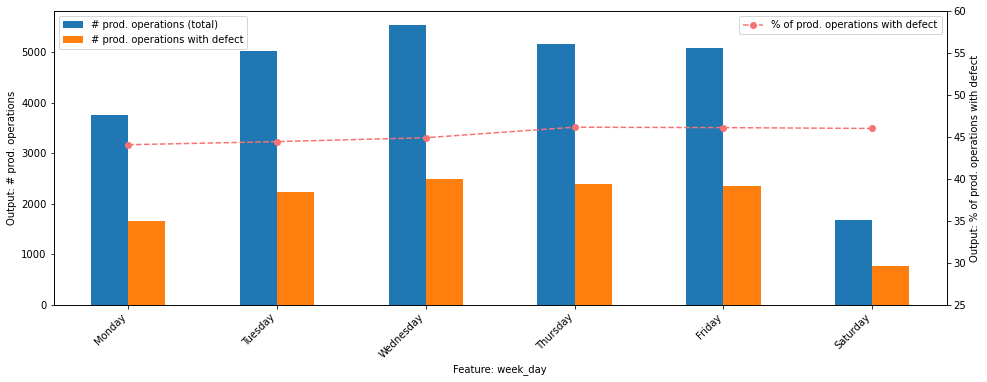

In [355]:
df4 = df.copy()

df4 = df4[df4["week_day"] != 6]

# production orders
s1 = df4.groupby("week_day")["week_day"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("week_day")["week_day"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("week_day")["week_day"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

week_days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df2.replace({"week_day": week_days}, inplace=True)



pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="week_day", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="week_day", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "week_day"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=25, ymax=60)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-week_day.png'))

#### Dimensions

,n_operations,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,1,9622,5143,1294.00,53.45,36.64,42.97
1,2,8282,4037,464.00,48.74,31.54,33.73
2,3,6265,2230,234.00,35.59,23.86,18.63
3,4,2091,559,48.00,26.73,7.96,4.67


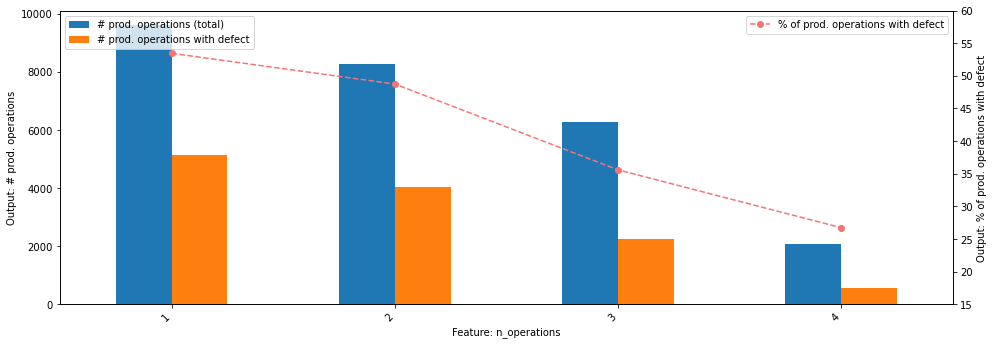

In [35]:
df4 = df.copy()

# production orders
s1 = df4.groupby("n_operations")["n_operations"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("n_operations")["n_operations"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("n_operations")["n_operations"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2 = df2[df2["n_operations"] < 5]

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

n_operations = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7"}
df2.replace({"n_operations": n_operations}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="n_operations", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="n_operations", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "n_operations"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=15, ymax=60)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-n_operations.png'))

## Gráfico 2D

,Tipo de operação,Qtd.ordem,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,APLICAÇÃO DE ESMALTE BRANCO,76,1,NaN,NaN,NaN,0.00,NaN
1,APLICAÇÃO DE ESMALTE BRANCO,93,1,NaN,NaN,NaN,0.00,NaN
2,APLICAÇÃO DE ESMALTE BRANCO,95,1,NaN,NaN,NaN,0.00,NaN
3,APLICAÇÃO DE ESMALTE BRANCO,100,1,NaN,NaN,NaN,0.00,NaN
4,APLICAÇÃO DE ESMALTE BRANCO,118,1,NaN,NaN,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...
11831,EMBALAMENTO,10718,1,NaN,NaN,NaN,0.00,NaN
11832,EMBALAMENTO,13343,1,NaN,NaN,NaN,0.00,NaN
11833,EMBALAMENTO,15809,1,NaN,NaN,NaN,0.00,NaN
11834,EMBALAMENTO,17046,1,NaN,NaN,NaN,0.00,NaN


1 int64


---

##### Feature: Tipo de operação + Qtd.ordem

,Tipo de operação,Qtd.ordem,out_defects,out_Qtd.ordem,percentage
0,APLICAÇÃO DE ESMALTE BRANCO,"(-4.989, 1003.9]",5549,171163,3.24
1,APLICAÇÃO DE ESMALTE BRANCO,"(1003.9, 2002.8]",11398,434555,2.62
2,APLICAÇÃO DE ESMALTE BRANCO,"(2002.8, 3001.7]",11872,484901,2.45
3,APLICAÇÃO DE ESMALTE BRANCO,"(3001.7, 4000.6]",9886,718719,1.38
4,APLICAÇÃO DE ESMALTE BRANCO,"(4000.6, 4999.5]",7218,525401,1.37
5,APLICAÇÃO DE ESMALTE BRANCO,"(4999.5, 5998.4]",9067,632181,1.43
6,APLICAÇÃO DE ESMALTE BRANCO,"(5998.4, 6997.3]",6824,580663,1.18
7,APLICAÇÃO DE ESMALTE BRANCO,"(6997.3, 7996.2]",7567,557965,1.36
8,APLICAÇÃO DE ESMALTE BRANCO,"(7996.2, 8995.1]",6851,652130,1.05
9,APLICAÇÃO DE ESMALTE BRANCO,"(8995.1, 9994.0]",7373,411688,1.79


Output:  percentage


---

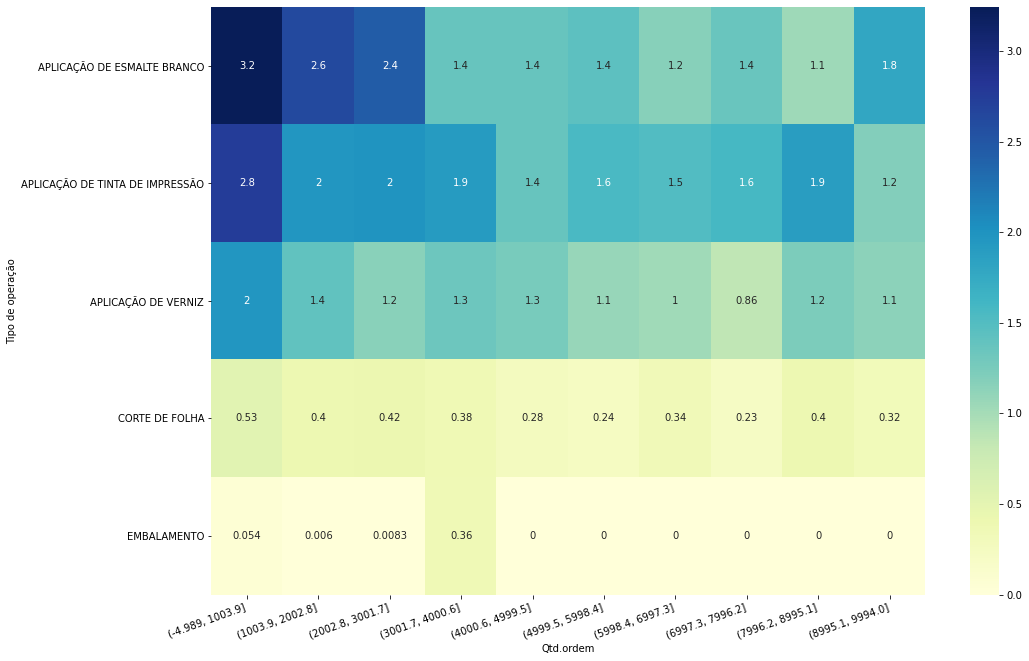

In [11]:
df4 = df.copy()

data_2D = ["Tipo de operação","Qtd.ordem"] # "Tipo de operação","Difference","Qtd.ordem"

# production orders
s1 = df4.groupby(data_2D)[data_2D[0]].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby(data_2D)[data_2D[0]].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby(data_2D)[data_2D[0]].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

# df2 = df2[df2[data_2D[0]] < 5]

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

n_operations = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7"}
df2.replace({"n_operations": n_operations}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

#heatmap

df3 = df.copy()
df3 = df3[df3["Difference"] <= 18]
df3 = df3[df3["Qtd.ordem"] < 10000]

# df.dtypes
df3 = show_table(data_2D, bins=True, nbins=10, dfnew=df3)

show_graphic2D(df3, data_2D, "percentage")
# show_graphic2D(df3, data_2D, "out_defects")


# ax = df2.plot(x="n_operations", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

# ax1 = ax.twinx()
# df2.plot(ax=ax1, x="n_operations", y="% of prod. operations with defect", style="o--",color="#F87474")
    
# ax.set_xlabel(str('Feature: ' + "n_operations"))
# ax.figure.autofmt_xdate(rotation=45)
# ax.legend(loc="upper left")
# ax.set_ylabel(str('Output: # prod. operations'))
# ax1.legend(loc="upper right")
# ax1.set_ylabel(str('Output: % of prod. operations with defect'))
# ax1.axis(ymin=15, ymax=60)

# # save the figure
# results_dir = 'Results/'
# plt.savefig(results_dir + str('plot-n_operations.png'))

---

## Backup

In [8]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
    
class Bttns:
    import ipywidgets as widgets
    from IPython.display import display, clear_output, Markdown
    
    def __init__(self):
        
        # --------------------- 1D --------------------- 
        
        # creating menu with them
        self.dropdown = self.widgets.Dropdown(options=selected_data, description="Feature: ")
        self.out_dropdown = self.widgets.Dropdown(options=selected_output)

        # button, output, function and linkage
        self.butt1 = self.widgets.Button(description='Table', tooltip='table1D')
        self.butt2 = self.widgets.Button(description='Graphic', tooltip='graphic1D')
        self.filter_butt = self.widgets.Button(description='Filter', icon="filter", tooltip='1D')
        self.options_butt = self.widgets.Button(description='Options', icon="ellipsis-v", tooltip='1D')
        self.output_butt = self.widgets.Button(description='Output', icon="arrow-right", tooltip='1D')
        self.o_options = out_checkboxes
        self.multiple = self.widgets.SelectMultiple()
        self.b_options = list(range(1, 21)) ; self.b_options.append("auto")
        self.nbins = self.widgets.Dropdown(value = "auto", options=self.b_options, description="number of bins")
        self.bins = self.widgets.Checkbox(value=True, description="Bins")
        self.percent = self.widgets.Checkbox(value=False, description="percentage")
        self.vpercent = self.widgets.ToggleButtons(options=["Absolute", "Relative"], description="Percentage")
        self.min_check = self.widgets.Checkbox(value=False, description="Interval of values")
        self.min_value = self.widgets.IntRangeSlider()

        self.outt1 = self.widgets.Output() ; self.outt2 = self.widgets.Output() ; self.outt3 = self.widgets.Output()


        self.butt1.on_click(self.on_butt_clicked1)
        self.butt2.on_click(self.on_butt_clicked2)
        self.output_butt.on_click(self.output_butt_clicked)
        self.filter_butt.on_click(self.filter_butt_clicked)
        self.options_butt.on_click(self.options_butt_clicked)

        self.tab1 = self.widgets.VBox()
        self.tab1_1 = self.widgets.HBox([self.output_butt, self.filter_butt, self.options_butt])
        self.tab1.children = [self.tab1_1, self.widgets.HBox([self.outt2, self.outt3])]
        
        # --------------------- 2D --------------------- 
        
        # creating menu with them   
        self.dropdown2_1 = self.widgets.Dropdown(
            options=selected_data, description="Feature 1: ")
        self.dropdown2_2 = self.widgets.Dropdown(
            options=selected_data, description="Feature 2: ")
        self.out_dropdown2 = self.widgets.Dropdown(options=selected_output)

        # button, output, function and linkage
        self.butt2_1 = self.widgets.Button(description='Table', tooltip='table2D')
        self.butt2_2 = self.widgets.Button(description='Graphic', tooltip='graphic2D')

        self.filter_butt2 = self.widgets.Button(description='Filter', icon="filter", tooltip='2D')
        self.options_butt2 = self.widgets.Button(description='Options', icon="ellipsis-v", tooltip='2D')
        self.output_butt2 = self.widgets.Button(description='Output', icon="arrow-right", tooltip='2D')
        self.o_options2 = out_checkboxes
        self.multiple2 = self.widgets.SelectMultiple()
        self.nbins2 = self.widgets.Dropdown(value = "auto", options=self.b_options, description="number of bins", tooltip='2D')
        self.bins2 = self.widgets.Checkbox(value=True, description="Bins", tooltip='2D')
        self.percent2 = self.widgets.Checkbox(value=False, description="percentage", tooltip='2D')
        self.vpercent2 = self.widgets.ToggleButtons(options=["Absolute", "Relative"], description="Percentage", tooltip='2D')
        self.min_check2 = self.widgets.Checkbox(value=False, description="Interval of values", tooltip='2D')
        self.min_value2 = self.widgets.IntRangeSlider()

        self.outt2_1 = self.widgets.Output() ; self.outt2_2 = self.widgets.Output() ; self.outt2_3 = self.widgets.Output()


        self.butt2_1.on_click(self.on_butt_clicked1)
        self.butt2_2.on_click(self.on_butt_clicked2)
        self.output_butt2.on_click(self.output_butt_clicked)
        self.filter_butt2.on_click(self.filter_butt_clicked)
        self.options_butt2.on_click(self.options_butt_clicked)

        self.tab2 = self.widgets.VBox()
        self.tab2_1 = self.widgets.HBox([self.output_butt2, self.filter_butt2, self.options_butt2])
        self.tab2.children = [self.tab2_1, self.widgets.HBox([self.outt2_2, self.outt2_3])]
        
        

    def output_1D(self):
        # display
        display(self.widgets.VBox([self.dropdown, self.widgets.VBox(children=[self.tab1]),
                    self.widgets.HBox([self.butt1, self.butt2]), self.outt1]))
        
    def output_2D(self):
        # display
        display(self.widgets.VBox([self.widgets.HBox([self.dropdown2_1, self.dropdown2_2]),
                              self.widgets.VBox(children=[self.tab2]),
                              self.widgets.HBox([self.butt2_1, self.butt2_2]), self.outt2_1]))

        
    def filter_butt_clicked(self, b):
        if "1D" in b.tooltip:
            self.tab1.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt3:
                clear_output()
            with self.outt2:
                clear_output()
                d = str(self.dropdown.value)
                display(Markdown('Select value to be evaluated:'))
                s = selected_data.copy()
                s.remove(d) ; s.append("None")
                self.widgets.interact(self.filter_butt_clicked1, x=s);
        elif "2D" in b.tooltip:
            self.tab2.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt2_3:
                clear_output()
            with self.outt2_2:
                clear_output()
                d1 = str(self.dropdown2_1.value) ; d2 = str(self.dropdown2_2.value)
                if d1 == d2:
                    display(Markdown("Choose diferent variables!"))
                else:
                    display(Markdown('Select value to be evaluated:'))
                    s = selected_data.copy()
                    s.remove(d1) ; s.remove(d2) ; s.append("None")
                    self.widgets.interact(self.filter_butt_clicked2, x=s);


    def options_butt_clicked(self, b):
        if "1D" in b.tooltip:
            self.tab1.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt3:
                clear_output()
            with self.outt2:
                clear_output()
                display(Markdown('More options:'))
                w = self.widgets.interactive(self.options_butt_clicked1, x=self.percent, y=self.min_check, z=self.bins)
                display(self.widgets.VBox([w]))
        elif "2D" in b.tooltip:
            self.tab2.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt2_3:
                clear_output()
            with self.outt2_2:
                clear_output()
                display(Markdown('More options:'))
                w = self.widgets.interactive(self.options_butt_clicked2, x=self.percent2, y=self.min_check2, z=self.bins2)
                display(w)


    def output_butt_clicked(self, b):
        if "1D" in b.tooltip:
            self.tab1.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt3:
                clear_output()
            with self.outt2:
                clear_output()
                display(Markdown('Output options:'))
                self.o_options = []
                for i in range(0, len(selected_output)):
                    w = self.widgets.Checkbox(value=True, description=out_checkboxes[i].description)
                    self.o_options.append(w)
                if(self.o_options[-1].description != "percentage"):
                    self.o_options.append(self.percent)
                display(self.widgets.VBox(self.o_options))
        elif "2D" in b.tooltip:
            self.tab1.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt2_3:
                clear_output()
            with self.outt2_2:
                clear_output()
                display(Markdown('Output options:'))
                w = []
                w = selected_output.copy() ;
                w.append('percentage')
                print(w)
                self.o_options2 = self.widgets.RadioButtons(options=w, value='percentage')
                display(self.o_options2)


    def on_butt_clicked1(self, b):
        if "1D" in b.tooltip:
            with self.outt1:
                clear_output()
                d = str(self.dropdown.value)
                if self.multiple == -1:
                    mvalue = () ; desc=""
                else:
                    mvalue = self.multiple.value ; desc = self.multiple.description
                b = self.bins.value ; nb = self.nbins.value
                ichk = self.min_check.value ; iv = self.min_value.value ; ivar = str(self.out_dropdown.value)
                show_table(d, desc, mvalue, bins=b, nbins=nb, int_check=ichk, int_var= ivar, int_value=iv)
        elif "2D" in b.tooltip:
            with self.outt2_1:
                clear_output()
                d1 = str(self.dropdown2_1.value) ; d2 = str(self.dropdown2_2.value) ; lst12 = [d1, d2]
                b = self.bins2.value ; nb = self.nbins2.value
                if self.multiple2 == -1:
                    mvalue=() ; desc=""
                else:
                    mvalue = self.multiple2.value ; desc = self.multiple2.description
                ichk = self.min_check2.value ; iv = self.min_value2.value ; ivar = str(self.out_dropdown2.value)
                print(mvalue)
                if d1 == d2: print("Choose diferent variables!")
                else: show_table(lst12, desc, mvalue, bins=b, nbins=nb, int_check=ichk, int_var= ivar, int_value=iv)


    def on_butt_clicked2(self, b):
        if "1D" in b.tooltip:
            with self.outt1:
                d = str(self.dropdown.value) ; out = self.o_options
                if self.multiple == -1:
                    mvalue = () ; desc=""
                else:
                    mvalue = self.multiple.value ; desc = self.multiple.description
                b = self.bins.value ; nb = self.nbins.value
                ichk = self.min_check.value ; iv = self.min_value.value ; ivar = str(self.out_dropdown.value)
                df2 = show_table(d, desc, mvalue, disp=False, bins=b, nbins=nb, int_check=ichk, int_var= ivar, int_value=iv)
                clear_output()
                show_graphic1D(df2, d, out, desc, mvalue,sel_output=[])
        elif "2D" in b.tooltip:
            with self.outt2_1:
                clear_output()
                d1 = str(self.dropdown2_1.value) ; d2 = str(self.dropdown2_2.value)
                out = str(self.out_dropdown2.value) ; lst12 = [d1, d2]
                if d1 == d2: print("Choose diferent variables!")
                else:
                    b = self.bins2.value ; nb = self.nbins2.value
                    if self.multiple2 == -1:
                        mvalue = () ; desc=""
                    else:
                        mvalue = self.multiple2.value ; desc = self.multiple2.description
                    ichk = self.min_check2.value ; iv = self.min_value2.value ; ivar = str(self.out_dropdown2.value)
                    df2 = show_table(lst12, desc, mvalue, disp=False, bins=b, nbins=nb, int_check=ichk, int_var= ivar, int_value=iv)
                    clear_output()
                    print(desc, mvalue)
                    try:
                        show_graphic2D(df2, lst12, output=self.o_options2.value)
                    except:
                        print('Choose the output of the graphic')


    def options_butt_clicked1(self, x, y, z):
        with self.outt3:
            clear_output()

            d = str(self.dropdown.value) ; b = self.bins.value
            df1 = show_table(d, bins=b, disp=False)

            global min_value
            min_value = self.widgets.IntRangeSlider(min=df1[self.out_dropdown.value].min(),
                                                    max=df1[self.out_dropdown.value].max())
            self.vpercent.disabled = not x ; self.min_value.disabled = not y ; self.nbins.disabled = not z

            display(self.vpercent, self.widgets.HBox([self.out_dropdown, self.min_value]), self.nbins)


    def options_butt_clicked2(self, x, y, z):
        with self.outt2_3:
            clear_output()

            d1 = str(self.dropdown2_1.value) ; d2 = str(self.dropdown2_2.value) ; b = self.bins2.value
            lst12 = [d1, d2]
            if d1 == d2: print("Choose diferent variables!")
            else:
                df1 = show_table(lst12, bins=b, disp=False)

                global min_value2
                min_value2 = self.widgets.IntRangeSlider(min=df1[self.out_dropdown2.value].min(),
                                                         max=df1[self.out_dropdown2.value].max())
                self.vpercent2.disabled = not x ; self.min_value2.disabled = not y ; self.nbins2.disabled = not z

                display(self.vpercent2, self.widgets.HBox([self.out_dropdown2, self.min_value2]), self.nbins2)


    def filter_butt_clicked1(self, x):
        with self.outt3:
            clear_output()
            if x == "None":
                self.multiple = -1
            else:
                options=df[x].unique()
                self.multiple = self.widgets.SelectMultiple(options=options, description=x, disabled=False)
                display(self.multiple)

            
    def filter_butt_clicked2(self, x):
        with self.outt2_3:
            clear_output()
            if x == "None":
                self.multiple2 = -1
            else:
                options=df[x].unique()
                self.multiple2 = self.widgets.SelectMultiple(options=options, description=x, disabled=False)
                display(self.multiple2)


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams["figure.figsize"] = (16,6)

typedata = {"object": "bar", "float64": "bar", "category": "bar", "int64": "bar"}


def show_table(d, desc="", mvalue=(), disp=True, bins=False, nbins='auto', int_check=False, int_var= "", int_value=[], dfnew=pd.DataFrame()):
    
    global selected_output
    output_options = {selected_output[0]: 'sum', selected_output[1]: 'sum'}
    
    if len(mvalue) != 0:
        df1 = df[df[desc].isin(mvalue)]
        if isinstance(d, str):
            title = "##### Feature: " + d + " for " + desc + "=" + str(mvalue)
        elif isinstance(d, list):
            title = str("##### Feature: " + d[0] + " + " + d[1] + " for " + desc + "=" + str(mvalue))
    else: 
        df1 = df
        if isinstance(d, str):
            title = str("##### Feature: " + d)
        elif isinstance(d, list):
            title = str("##### Feature: " + d[0] + " + " + d[1])
    
    if not(dfnew.empty):
        df1 = dfnew
    
    if int_check:
        df1 = df1[df1[int_var] >= int_value[0]]
        df1 = df1[df1[int_var] <= int_value[1]]
        
    if bins and isinstance(d, str):
        if str(df1[d].dtype) in ['float64', 'int64']:
            df1 = df1.groupby(d, as_index=False).agg(output_options)
            if nbins == "auto":
                nbins = max(3,min(round(len(df1.index)/4),20))
            df1[d] = pd.cut(df1[d], bins=nbins)
        df2 = df1.groupby(d, as_index=False).agg(output_options)
    elif bins and isinstance(d, list):
        dft = []
        for i in d:
            dft.append(str(df1[i].dtype))
            
        df1 = df1.groupby(d, as_index=False).agg(output_options)
        
        for idx, val in enumerate(dft):
            df3 = df1
            if val in ['float64', 'int64']:
                print(idx,val)
                if nbins == "auto":
                    nbins = max(3,min(round(len(df1.index)/4),20))
                df1[d[idx]] = pd.cut(df3[d[idx]], bins=nbins)
        
        df2 = df1.groupby(by=d, as_index=False, observed=True).agg(output_options)
    else:
        df2 = df1.groupby(by=d, as_index=False).agg(output_options)
    
    df2["percentage"] = df2[selected_output[0]]/df2[selected_output[1]]*100
#     df2_style = df2.style.format({'percentage': "{:.2%}"})
    
    if disp:
        display(Markdown("---"))
        display(Markdown(title))
        display(df2)
        
    return df2


def show_graphic1D(df1, d, output=[], desc="", mvalue=[], sel_output=[]):
    dft = str(df1[d].dtype)
    display(Markdown("---"))
    
    if len(mvalue) != 0:
        title = "Feature: " + d + " for " + desc + "=" + str(mvalue)
    else:
        title = str("Feature: " + d)
    
    print("sel",sel_output)
    if sel_output == []:
        for i in range(0, len(output)):
                if output[i].value == True:
                    print("value",output[i].value)
                    sel_output.append(str(output[i].description))
    
    print(dft)
    print(output)
    print("sel",sel_output)
    if dft == "object":
        if len(sel_output) == 1:
            ax = df1.plot(x=d, y=sel_output[0], title=title, kind=typedata[dft], color="tab:blue")
        elif len(sel_output) == 2:
            if 'percentage' in sel_output:
                ax = df1.plot(x=d, y=sel_output[0], title=title, kind=typedata[dft], width=-0.3, color="tab:orange", align='edge')
                ax1 = ax.twinx()
                df1.plot(ax=ax1, x=d, y=sel_output[1], kind=typedata[dft], width=0.3, color="tab:blue", align='edge')
            else:
                ax = df1.plot(x=d, y=sel_output, title=title, kind=typedata[dft], align='edge')
    elif dft in ["float64", "int64", "category"]:
        if len(sel_output) == 1:
            ax = df1.plot(x=d, y=sel_output[0], title=title, kind=typedata[dft], style="o-", color="tab:blue")
        elif len(sel_output) == 2:
            if 'percentage' in sel_output:
                ax = df1.plot(x=d, y=sel_output[0], title=title, kind=typedata[dft], style="o-", width=-0.3, color="tab:orange", align='edge')
                ax1 = ax.twinx()
                df1.plot(ax=ax1, x=d, y=sel_output[1], kind=typedata[dft], style="o--", width=0.3, color="tab:blue", align='edge')
            else:
                ax = df1.plot(x=d, y=sel_output, title=title, kind=typedata[dft], align='edge')
    
    ax.set_xlabel(str('Feature: ' + d))
    ax.figure.autofmt_xdate(rotation=45)
    ax.legend(loc="upper left")
    ax.set_ylabel(str('Output: ' + sel_output[0]))
    if len(sel_output) == 2 and 'percentage' in sel_output:
        ax1.set_ylabel(str('Output: ' + sel_output[1]))
    
    # save the figure
    results_dir = 'Results/'
    plt.savefig(results_dir + str('plot-1D-' + d + ' + ' + desc + '.png'))
    
    plt.show()
    

    
def show_graphic2D(df1, d, output):
    dft = []
    print("Output: ", output)
    for i in d:
        dft.append(str(df1[i].dtype))
        
    display(Markdown("---"))
    fig = plt.figure(figsize=(16, 12))
    if all(x == "float64" for x in dft):
        rcParams["figure.figsize"] = (16,6)
        pivot = df1.pivot(d[0], d[1], output)
        sns.heatmap(data=pivot, annot=True, cmap="YlGnBu")
#         sns.relplot(data=df1, x=d[0], y=d[1], hue=output[0], size=output[0], sizes=(100,700))
    elif not all(x != "float64" for x in dft):
        pivot = df1.pivot(d[0], d[1], output)
        sns.heatmap(data=pivot, annot=True, cmap="YlGnBu")
    elif all(x != "float64" for x in dft):
        pivot = df1.pivot(d[0], d[1], output)
        sns.heatmap(data=pivot, annot=True, cmap="YlGnBu")
    
    # save the figure
    fig.autofmt_xdate(rotation=20)
    results_dir = 'Results/'
    plt.savefig(results_dir + str('plot-2D-' + d[0] + ' + ' + d[1] + '.png'))
    plt.show()